Problem Statement:
Detect Objects of Similar Color



This code detects objects of a specific color in an image using OpenCV’s color segmentation and contour detection techniques. It begins by loading an image and converting it to the HSV color space, which is ideal for segmenting colors. A color range is specified (e.g., for detecting red), and a binary mask is created to isolate regions of the image that match the desired color. The contours of these color regions are then detected and used to draw bounding boxes around the objects. Finally, the image with the detected objects is displayed, and the number of objects is printed to the terminal.

In [1]:
# Step 1: Install necessary libraries
!pip install opencv-python-headless kaggle

In [ ]:
# Step 2: Upload Kaggle API token
from google.colab import files
files.upload()

In [ ]:
 # Step 3: Set proper permissions
!chmod 600 /content/kaggle.json

# Step 4: Download the dataset containing images
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

# Step 5: Unzip the dataset
!unzip fruit-images-for-object-detection.zip -d ./fruit_images_dataset/



Available files: ['apple_4.jpg', 'apple_8.jpg', 'orange_29.jpg', 'apple_39.jpg', 'apple_69.jpg', 'banana_21.jpg', 'banana_24.xml', 'apple_1.xml', 'banana_4.jpg', 'orange_41.xml', 'apple_18.xml', 'apple_19.xml', 'orange_28.jpg', 'banana_63.xml', 'apple_15.jpg', 'apple_32.jpg', 'apple_73.xml', 'orange_47.xml', 'mixed_15.xml', 'banana_33.jpg', 'banana_17.jpg', 'banana_20.xml', 'apple_11.jpg', 'mixed_5.xml', 'banana_68.jpg', 'banana_24.jpg', 'banana_42.jpg', 'apple_74.jpg', 'orange_9.xml', 'apple_13.jpg', 'banana_26.jpg', 'banana_32.jpg', 'banana_14.jpg', 'banana_44.xml', 'banana_74.jpg', 'mixed_12.jpg', 'apple_7.jpg', 'apple_19.jpg', 'banana_25.xml', 'banana_64.jpg', 'banana_43.jpg', 'apple_30.jpg', 'orange_60.jpg', 'apple_45.xml', 'banana_28.xml', 'orange_20.jpg', 'orange_54.jpg', 'apple_21.xml', 'banana_63.jpg', 'mixed_14.jpg', 'mixed_13.xml', 'apple_59.jpg', 'banana_64.xml', 'mixed_2.jpg', 'apple_12.xml', 'mixed_3.jpg', 'banana_72.xml', 'orange_60.xml', 'mixed_7.xml', 'orange_61.xml', 

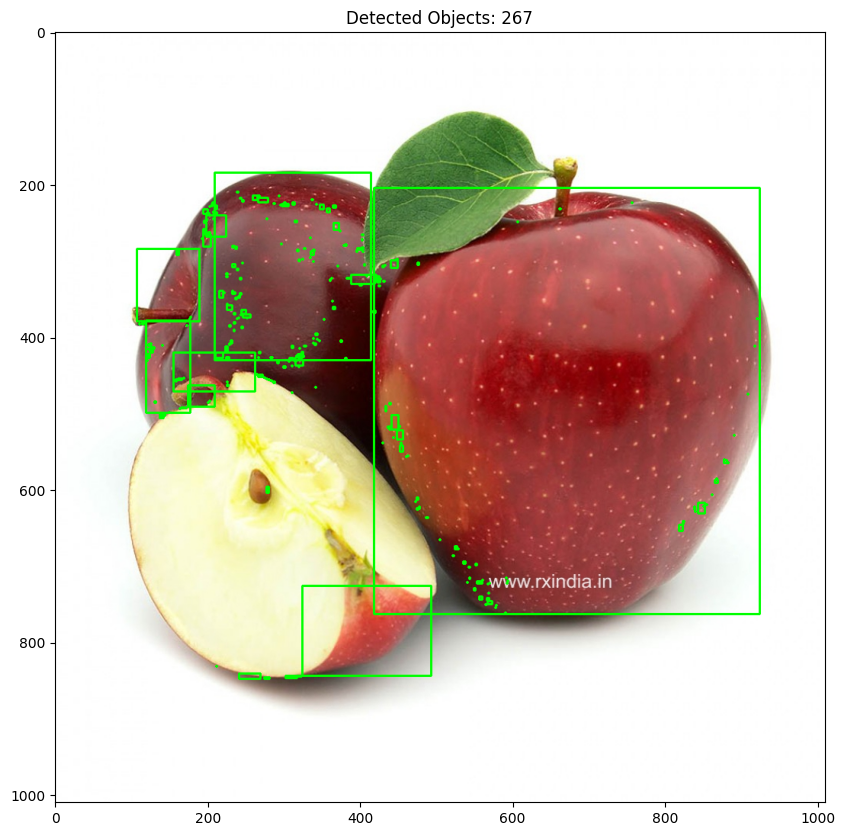

Detected 267 objects with similar color.


In [8]:
# Step 6: List the contents of the dataset to verify the images
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_dir = '/content/fruit_images_dataset/train_zip/train/'
print("Available files:", os.listdir(image_dir))

# Step 7: Load one of the images for color detection
image_path = os.path.join(image_dir, 'apple_68.jpg')
image = cv2.imread(image_path)

# Step 8: Check if image loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color range
    lower_bound = np.array([0, 100, 100])
    upper_bound = np.array([10, 255, 255])

    # Create a mask
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Perform bitwise-AND to extract the color regions
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    # Find contours of the detected objects
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around detected objects
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with detected objects using matplotlib
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Detected Objects: {len(contours)}')
    plt.show()

    # Output the result
    print(f"Detected {len(contours)} objects with similar color.")